In [5]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
df = pd.read_csv('../data/filtered_data.csv')
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1,1,22,1,150773,1,2
1,0,0,49,1,89210,0,0
2,0,0,45,1,171565,1,1
3,0,0,53,1,149031,1,1
4,0,0,35,1,144848,0,0
...,...,...,...,...,...,...,...
1863,1,0,47,1,123525,0,0
1864,1,1,27,1,117744,1,0
1865,0,0,31,0,86400,0,0
1866,1,1,24,1,97968,0,0


In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.066443,0.991471,-1.230102,0.013739,1.186570,0.385436,1.620266
1,-0.937697,-1.008602,1.376024,0.013739,-0.891570,-1.258387,-0.872862
2,-0.937697,-1.008602,0.989931,0.013739,1.888432,0.385436,0.373702
3,-0.937697,-1.008602,1.762116,0.013739,1.127767,0.385436,0.373702
4,-0.937697,-1.008602,0.024699,0.013739,0.986564,-1.258387,-0.872862
...,...,...,...,...,...,...,...
1863,1.066443,-1.008602,1.182977,0.013739,0.266778,-1.258387,-0.872862
1864,1.066443,0.991471,-0.747486,0.013739,0.071633,0.385436,-0.872862
1865,-0.937697,-1.008602,-0.361394,-1.819386,-0.986425,-1.258387,-0.872862
1866,1.066443,0.991471,-1.037056,0.013739,-0.595932,-1.258387,-0.872862


# Encontrando o número adequado de clusters

## Elbow method

In [27]:
# Método elbow

erro = []
score_silhueta = []



for i in range(2,21):
#     pipeline = Pipeline(
#         [
#             ('scaler', StandardScaler()),
#             ('kmeans', KMeans(n_clusters=i, random_state=42))
#         ]
#     )
    
    model = KMeans(n_clusters=i, random_state=42)
    #clusters = pipeline.fit_predict(df)
    clusters = model.fit_predict(df_scaled)
    #erro.append(pipeline.named_steps['kmeans'].inertia_)
    erro.append(model.inertia_)
    score_silhueta.append(silhouette_score(df_scaled, clusters))

erro
score_silhueta

[0.24272669084907486,
 0.2365814744697906,
 0.2700489585300145,
 0.246696956501883,
 0.2643120780970563,
 0.287278939733409,
 0.29485800916831395,
 0.29226339021619224,
 0.30406268099491573,
 0.3215416598229467,
 0.32465194504999006,
 0.31555640586379663,
 0.3441053233522932,
 0.3434450856774885,
 0.3510934772048201,
 0.3549007532598555,
 0.36379531411317717,
 0.35255731571622595,
 0.3709883833341655]

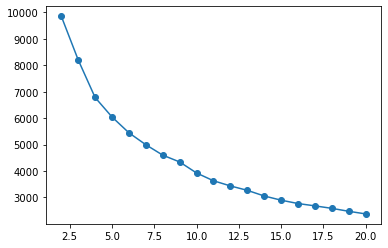

In [28]:
plt.scatter(range(2,21), erro)
plt.plot(range(2,21), erro)

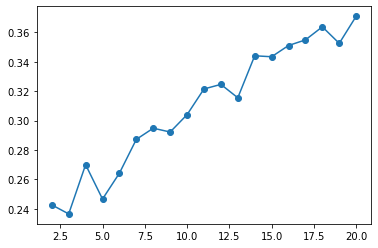

In [29]:
plt.scatter(range(2,21), score_silhueta)
plt.plot(range(2,21), score_silhueta)

# Treinando modelo com k = 5

In [38]:
model = KMeans(n_clusters=5, random_state=42)
clusters = model.fit_predict(df_scaled)
clusters

array([4, 1, 2, ..., 1, 0, 1])

In [47]:
df['Cluster'] = clusters+1
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,1,1,22,1,150773,1,2,5
1,0,0,49,1,89210,0,0,2
2,0,0,45,1,171565,1,1,3
3,0,0,53,1,149031,1,1,3
4,0,0,35,1,144848,0,0,2
...,...,...,...,...,...,...,...,...
1863,1,0,47,1,123525,0,0,2
1864,1,1,27,1,117744,1,0,1
1865,0,0,31,0,86400,0,0,2
1866,1,1,24,1,97968,0,0,1


In [40]:
df_scaled

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.066443,0.991471,-1.230102,0.013739,1.186570,0.385436,1.620266
1,-0.937697,-1.008602,1.376024,0.013739,-0.891570,-1.258387,-0.872862
2,-0.937697,-1.008602,0.989931,0.013739,1.888432,0.385436,0.373702
3,-0.937697,-1.008602,1.762116,0.013739,1.127767,0.385436,0.373702
4,-0.937697,-1.008602,0.024699,0.013739,0.986564,-1.258387,-0.872862
...,...,...,...,...,...,...,...
1863,1.066443,-1.008602,1.182977,0.013739,0.266778,-1.258387,-0.872862
1864,1.066443,0.991471,-0.747486,0.013739,0.071633,0.385436,-0.872862
1865,-0.937697,-1.008602,-0.361394,-1.819386,-0.986425,-1.258387,-0.872862
1866,1.066443,0.991471,-1.037056,0.013739,-0.595932,-1.258387,-0.872862


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca_data = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

df_pca

,PCA1,PCA2,PCA3
0,0.673861,0.878142,-2.235032
1,-0.588177,-0.780305,2.411650
2,2.177233,-0.262655,0.832005
3,1.993462,-0.185776,1.437589
4,0.020751,-0.812141,1.282051
...,...,...,...
1863,-0.722407,0.256946,1.594088
1864,-0.977552,0.820537,-1.107145
1865,-1.268046,-2.480272,0.736906
1866,-2.221810,0.500076,-0.575970


In [50]:
import plotly.express as px

fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3',
              color=df['Cluster'])
fig.show()

In [45]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

# Analisando clusters

In [133]:
numerical = ['Age', 'Income']

## Cluster 1

In [134]:
cluster = df[df['Cluster'] == 1]
cluster

,Unnamed: 0,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
994,994,0,0,1.202666,1,0.049229,1,1,1
995,995,1,1,-0.418983,1,-1.114599,0,0,1
996,996,0,1,0.349167,1,1.077305,2,1,1
997,997,0,0,0.178467,1,-0.601649,1,2,1
998,998,0,0,-1.101782,0,-0.653409,1,0,1
...,...,...,...,...,...,...,...,...,...
1491,1491,1,0,-1.016432,1,-1.053154,0,0,1
1492,1492,1,1,-1.101782,1,0.070095,1,0,1
1493,1493,1,1,-0.845732,1,-0.483248,1,1,1
1494,1494,1,0,-0.675033,1,-0.498865,1,0,1


<AxesSubplot:>

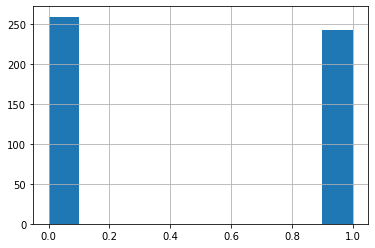

In [135]:
cluster['Sex'].hist()

<AxesSubplot:>

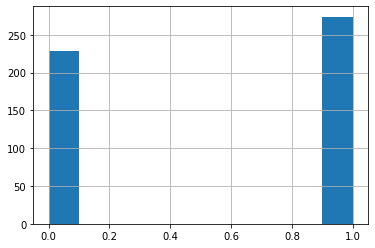

In [136]:
cluster['Marital status'].hist()

<AxesSubplot:>

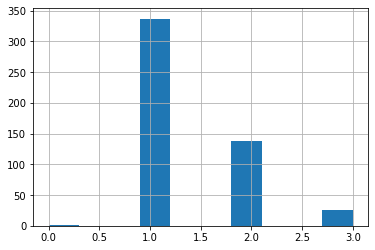

In [137]:
cluster['Education'].hist()

<AxesSubplot:>

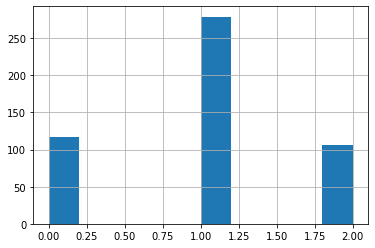

In [138]:
cluster['Occupation'].hist()

<AxesSubplot:>

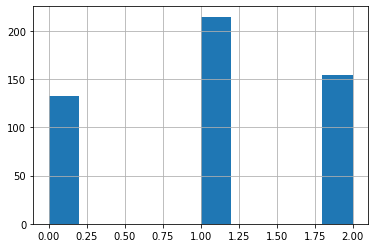

In [139]:
cluster['Settlement size'].hist()

In [140]:
cluster[numerical].describe()

,Age,Income
count,502.000000,502.000000
mean,0.366849,0.248589
std,1.168023,0.995489
min,-1.528532,-2.209868
25%,-0.589683,-0.367846
50%,0.093117,0.111710
75%,1.181328,0.707213
max,3.421764,4.923308


## Persona cluster 1

- **Mulher**
- **32 anos**
- **Não solteira**
- **Formada no High School**
- **Mora em cidade pequena**
- **Assalariada**
- **Salário de 106K**

In [147]:
cluster2 = df[df['Cluster'] == 2]
cluster3 = df[df['Cluster'] == 3]
cluster4 = df[df['Cluster'] == 4]

In [150]:
df

,Unnamed: 0,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,0,0,0,2.653614,2,0.097524,1,2,2
1,1,1,1,-1.187132,1,0.782654,1,2,2
2,2,0,0,1.117316,1,-0.833202,0,0,2
3,3,0,0,0.775916,1,1.328386,1,1,2
4,4,0,0,1.458716,1,0.736932,1,1,2
...,...,...,...,...,...,...,...,...,...
1995,1995,1,0,0.946616,1,0.067471,0,0,3
1996,1996,1,1,-0.760382,1,-0.084265,1,0,3
1997,1997,0,0,-0.418983,0,-0.906957,0,0,3
1998,1998,1,1,-1.016432,1,-0.603329,0,0,3


In [148]:
categories = df.drop(['Income', 'Age'], axis=1).columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cluster.drop(['Income', 'Age', 'Cluster'], axis=1).describe().loc['mean'].to_numpy(),
      theta=categories,
      fill='toself',
      name='Cluster 1'
))

fig.add_trace(go.Scatterpolar(
      r=cluster2.drop(['Income', 'Age', 'Cluster'], axis=1).describe().loc['mean'].to_numpy(),
      theta=categories,
      fill='toself',
      name='Cluster 2'
))

fig.add_trace(go.Scatterpolar(
      r=cluster3.drop(['Income', 'Age', 'Cluster'], axis=1).describe().loc['mean'].to_numpy(),
      theta=categories,
      fill='toself',
      name='Cluster 3'
))

fig.add_trace(go.Scatterpolar(
      r=cluster4.drop(['Income', 'Age', 'Cluster'], axis=1).describe().loc['mean'].to_numpy(),
      theta=categories,
      fill='toself',
      name='Cluster 4'
))


fig.show()

In [141]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(df.drop(['cluster', 'Cluster'], axis=1), df['Cluster'])

KeyError: "['cluster'] not found in axis"

In [108]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer(df.drop(['cluster', 'Cluster'], axis=1)).values

In [113]:
shap.plots.beeswarm(shap_values)

UnboundLocalError: local variable 'values' referenced before assignment

In [111]:
shap_values

array([[[-9.57964830e-03, -4.11160564e-03,  1.94976875e-03,
          1.21973614e-03,  1.05217491e-02],
        [ 5.95304145e-03, -1.16255277e-02, -2.93202535e-03,
          1.40722212e-03,  7.19728952e-03],
        [-2.85678497e-02,  3.33243532e-02, -8.68062203e-03,
          3.75037208e-03,  1.73746501e-04],
        ...,
        [-2.79043527e-01, -1.59034728e-01, -9.12103489e-02,
         -4.02052117e-02,  5.69493816e-01],
        [ 1.42447366e-02, -3.59859428e-02, -4.67013993e-02,
         -1.61493631e-02,  8.45919687e-02],
        [-7.99064170e-03,  1.86477127e-02, -2.88059969e-02,
          6.97395617e-03,  1.11749697e-02]],

       [[ 7.30991601e-03,  5.62779976e-03,  4.98963479e-05,
         -4.60732200e-03, -8.38029011e-03],
        [ 1.68702182e-03,  1.04621709e-02,  5.06236847e-04,
         -8.08632325e-03, -4.56910628e-03],
        [ 2.01466612e-02,  1.03892348e-03,  1.23133282e-02,
          3.26775799e-03, -3.67666709e-02],
        ...,
        [-3.97095893e-01,  5.6721208

In [12]:
pipeline = Pipeline(
        [
            ('scaler', StandardScaler()),
            ('kmeans', KMeans(n_clusters=4, random_state=42))
        ]
    )
#model = KMeans(n_clusters=i, random_state=42)
clusters = pipeline.fit_predict(df)

In [13]:
clusters

array([2, 0, 1, ..., 0, 0, 0])

In [14]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [15]:
pipeline.named_steps['kmeans'].inertia_

8306.787606242518